# Заголовок отчета по лабораторной работе

**Цель работы:**

*В работе использовался:* ...

## Теория

**Распределе́ние Пуассо́на** — вероятностное распределение дискретного типа, определяемое следующей формулой:
$$
P(k) = \frac{\lambda^k}{k!}e^{-\lambda},
$$
где $P(k)$ определяет веротность того, что произойдет $k$ событий, если в среднем проиходит $\lambda$ событий.

Вставляем изображение:

![](https://mipt.ru/upload/medialibrary/829/rus_text_prozrachnaya_podlozhka.png)

## Код

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('../../../data/data_1.1.4.txt', dtype=int)
print("Зарегистрированно частиц: {}".format(data.sum()))

Зарегистрированно частиц: 5159


## Интерактивная таблица

In [3]:
dataFrame = pd.DataFrame(data.reshape((20,10)))
dataFrame.head(20)

## Статичные графики

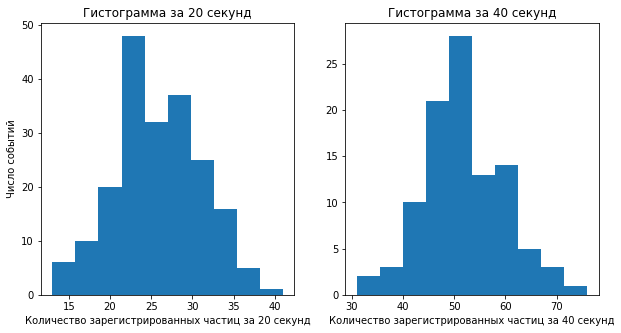

In [110]:

%matplotlib inline # Вывод графиков делается в виде статичных изображений

plt.figure(figsize=(2*5,5)) # Создаем фигуру размером 10x5 условных единиц
ylabel = 'Число событий'
xlabel = 'Количество зарегистрированных частиц за {} секунд'
title = 'Гистограмма за {} секунд'
# Разбиваем фигуру на области
plt.subplot(121) # 121 - Расшифровывается так: Разбить область на 1 строку и 2 столбца 
                    # и рисовать на 1 попорядку подобласти
plt.hist(data20) # Создаем гистограмму
plt.ylabel(ylabel) # Подписываем оси
plt.xlabel(xlabel.format(20)); # Подписываем оси
plt.title(title.format(20)); # Заголовок
plt.subplot(122) # 122 - Расшифровывается так: Разбить область на 1 строку и 2 столбца 
                    # и рисовать на 2 попорядку подобласти
plt.hist(data40) 
# plt.ylabel(ylabel)
plt.xlabel(xlabel.format(40))
plt.title(title.format(40));

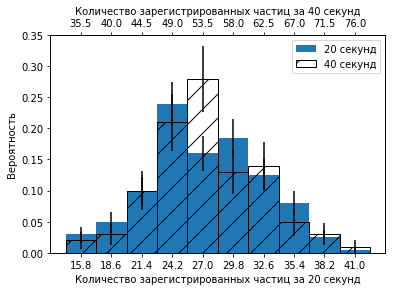

In [222]:
%matplotlib inline

# Общая гистограмма
legLabel="{} секунд"

fig, ax20 = plt.subplots()
ax20.set_ylabel("Вероятность")
ax40  = ax20.twiny()

# Выбираем количество бинов
n =  10
b= []
# Поскольку для отрисовки двух гистограмм нам нужно делать однотипные действия, уберём их в цикл
for ax, data, time, fill, hatch in zip([ax20,ax40], [data20, data40], [20,40], [True, False], [None, '/' ] ):
#     Гистограмируема данные
    hist = np.histogram(data, bins=n)
#     Выисляем положения центров бинов
    width =  np.diff(hist[1])
    binCenter = hist[1][:-1] + width
   
    x = np.arange(n) # Нужно что бы совместить две гистограмму
#     Считаем вероятность и погрешность
    probability  =hist[0]/np.sum(hist[0]) 
    error =  hist[0]**0.5 / np.sum(hist[0])
    
#     Строим график, объект возвращаемый график сохраняем, он нам пригодится
    b.append(ax.bar(x, height= probability, width=1, 
               yerr=error, fill=fill, label=legLabel.format(time),  hatch=hatch))
#     Настраиваем оси и заголовок
    ax.set_xlabel(xlabel.format(time))
    ax.set_xticks(range(n))
    ax.set_xticklabels(np.round(binCenter,1),);
    
# Отрисовываем легенду
plt.legend(b, [it.get_label() for it in b]);